In [2]:
import numpy as np 

### Linear Regression Class

In [43]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 1000) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # initialize the sample(x) and the features(y) array
        num_samples, num_features = X.shape
        # initialize the weights array randomly of size num_features
        self.weights = np.random.rand(num_features)
        self.bias = 0 # value of c(intercept)

        for i in range(self.n_iters):
            # eqn will be y = m.x + c (m = weights, c = bias)
            y_pred = np.dot(X, self.weights) + self.bias

            # the error becomes E = 1/n (y_i - (mx_i + c))^2
            # since we have to minimize this we take the derivative with respect to m(weights) and c(intercept)
            dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
            db = (1 / num_samples) * np.sum(y_pred - y)

            # update weights and biases accordingly
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

        return self
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

### Testing the Linear Regression Class 

In [5]:
from sklearn import datasets

In [44]:
X, y = datasets.make_regression(
        n_samples=500, n_features=1, noise=15, random_state=4)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=1, noise=15, random_state=4)

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (350, 1)
y_train shape: (350,)
X_test shape: (150, 1)
y_test shape: (150,)


In [9]:
import matplotlib.pyplot as plt

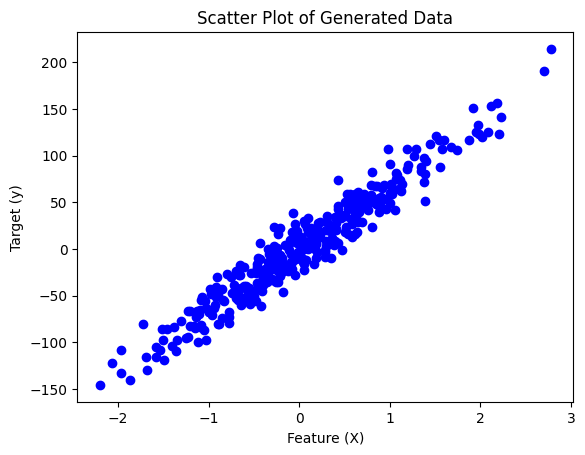

In [50]:
# Scatter plot of the data points
plt.scatter(X_train, y_train, color='blue', marker='o', label='Data points')

# Add labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Scatter Plot of Generated Data')

# Display the plot
plt.show()

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(X_train, y_train)

In [53]:
lr.weights 

array([66.13437302])

In [54]:
lr.bias

-0.08123903794128166

In [56]:
y_pred = lr.predict(X_test)

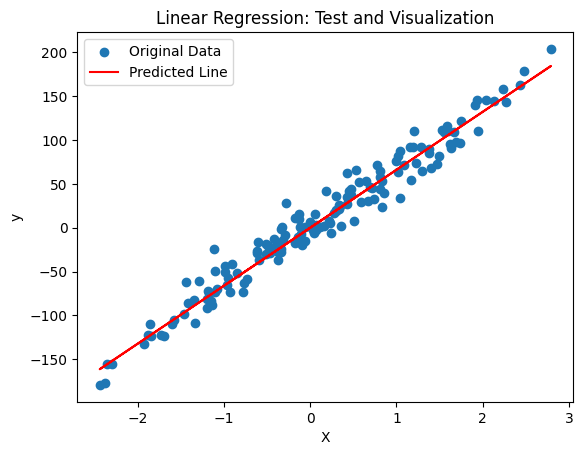

In [57]:
# Plot the original data and the predicted line

plt.scatter(X_test, y_test, label='Original Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')

    # Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression: Test and Visualization')

    # Add a legend
plt.legend()

    # Display the plot
plt.show()